# Análisis de datos para el experimento Forrajeo Social

## Resumen

En el presente Notebook, se presenta un análisis de los primeros datos recolectados del experimento ***Forrajeo Social***,y para la realización del experimento, desarrollé un videojuego multijugador en línea con el motor *Unity* y la API *Mirror Networking*, el cuál nombré ***The Foraging Game***.

El experimento intenta simular un escenario de búsqueda de recursos por parte de 2 o más participantes, y para esto, en el mapa de juego hay dos zonas separadas entre sí denominadas ***parches*** (uno con el ambiente de un bosque y otro de un desierto), y dentro de los parches estaban arbustos en donde se encontraban los recursos que debían de encontrar. 

Uno de los parches tendría más recursos que el otro, en una relación **50%/30%**, es decir, en un parche seleccionado por el juego de forma aleatoria, habría un **50%** de probabilidad de que al buscar en un arbusto, hubiera un recurso (un hongo) y en el otro parche solo habría un **30%** de probabilidad.

Todos los jugadores buscarían a la vez y dentro de un tiempo límite, que dadas las características del videojuego (tamaño del mapa, de los parches, separación entre cada parche, velocidad de desplazamiento del jugador, etc.), se eligió que fuera de 3 minutos.

El objetivo de los participantes, es encontrar la mayor cantidad de recursos y decidir cuál parche es el de mayor recursos, y si acertaban, se les aumentaba su puntuación, de lo contrario, disminuía.

Por cada grupo de participantes (5-10 jugadores), se realizaban 3 sesiones de búsqueda y cada punto que obtuvieron a lo largo de las 3 sesiones, se les otorgó un boleto para poder participar en un sorteo monetario.

## Data Wrangling

--------------------------------------------------------------------------------------------------------------------

Ya que tenemos el contexto del experimento, empecemos dandole un vistazo al archivo `Positions.csv` y cargando los datos:

El primer vistazo lo podemos hacer simplemente abriendo el archivo `Positions.csv` con Excel, Bloc de notas o desde Python usando la librería `csv`:

--------------------------------------------------------------------------------------------------------------------

In [50]:
# Primero vemos el contenido del archivo .csv para conocer su estructura:
import csv

with open("Datasets/Positions_Round_1.csv") as csvfile:
    
    # Leemos el contenido del archivo .csv
    line_reader = csv.reader(csvfile, delimiter=',')
    
    # Imprimimos en pantalla las primeras 10 líneas usando un contador
    counter = 0
    
    # Iniciamos un loop que lee las líneas del archivo que cargamos
    for line in line_reader:
        
        # Imprimimos en pantalla la línea junto a su delimitador
        print(', '.join(line))
        counter += 1
        
        # Si el contador llega a 10, salimos del loop
        if(counter == 10):
            break

Session date: 6/18/2021 8:28:26 PM
 
Players data every 1 seconds,  with the format: 
 
Player Name,  xPos,  yPos,  zPos,  xRot,  yRot,  score ,  Patch Selection
 
Francisco,  385,  1.1,  372.5,  0,  270,  0,  No Selection,  ozmar,  380,  1.1,  372.5,  0,  270,  0,  No Selection,  Daniel,  375,  1.1,  372.5,  0,  270,  0,  No Selection,  JoseCuellar,  370,  1.1,  372.5,  0,  270,  0,  No Selection,  Jose Angel Ruiz Garcia,  365,  1.1,  372.5,  0,  270,  0,  No Selection,  alan,  385,  1.1,  377.5,  0,  270,  0,  No Selection,  damselfly,  380,  1.1,  377.5,  0,  270,  0,  No Selection,  
Francisco,  385,  1.1,  372.5,  0,  270,  0,  No Selection,  ozmar,  380,  1.1,  372.5,  0,  270,  0,  No Selection,  Daniel,  375,  1.1,  372.5,  0,  270,  0,  No Selection,  JoseCuellar,  370,  1.1,  372.5,  0,  270,  0,  No Selection,  Jose Angel Ruiz Garcia,  365,  1.1,  372.5,  0,  270,  0,  No Selection,  alan,  385,  1.1,  377.5,  0,  270,  0,  No Selection,  damselfly,  380,  1.1,  377.5,  0,  

--------------------------------------------------------------------------------------------------------------------

De ahí hay varias cosas que podemos observar del archivo, primero, las líneas 1 y 3 no son información que se deba cargar al DataFrame:

`Session date: 6/18/2021 8:28:26 PM`
 
`Players data every 1 seconds,  with the format:`

Segundo, no hay un encabezado para todas las columnas, pues el que hay en la línea 5 es meramente informativo y no está pensado para ser cargado en una estructura de datos:

`Player Name,  xPos,  yPos,  zPos,  xRot,  yRot,  score ,  Patch Selection`

Tercero, los datos se recolectaron leyendo la información de cada jugador (Nombre, posición, etc) cada segundo del juego, por lo que una misma línea se encuentran todos los jugadores:

`Francisco,  385,  1.1,  372.5,  0,  270,  0,  No Selection,  ozmar,  380,  1.1,  372.5,  0,  270,  0,  No Selection,  Daniel,  375,  1.1,  372.5,  0,  270,  0,  No Selection,  JoseCuellar,  370,  1.1,  372.5,  0,  270,  0,  No Selection,  Jose Angel Ruiz Garcia,  365,  1.1,  372.5,  0,  270,  0,  No Selection,  alan,  385,  1.1,  377.5,  0,  270,  0,  No Selection,  damselfly,  380,  1.1,  377.5,  0,  270,  0,  No Selection, `

Con ésto en mente, al cargar nuestro datos en un DataFrame, hay que saltarnos las primeras 6 líneas, pues no forman parte de los datos que queremos analizar.

--------------------------------------------------------------------------------------------------------------------

In [51]:
import pandas as pd

# Cargamos los datos
df = pd.read_csv("Datasets/Positions_Round_1.csv", # Ruta del archivo
                 skiprows=6, # Saltamos las primeras 6 líneas
                 header = None) # Sin encabezado

# Vemos los primeros 5 elementos del DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,
1,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,
2,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,
3,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,
4,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,


--------------------------------------------------------------------------------------------------------------------

Aquí notamos que la última columna está vacía, así que habrá que eliminarla.

--------------------------------------------------------------------------------------------------------------------

In [52]:
# Eliminamos la columna vacía
df.drop([56], axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
1,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
2,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
3,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
4,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection


--------------------------------------------------------------------------------------------------------------------

Lo siguiente será organizar los datos por jugador y por tiempo de juego (que está determinado por el índice actual de nuestro DataFrame), para ello, en primer lugar separamos las columnas que corresponden a cada jugador y las organizamos en un solo DataFrame al que le podamos poner encabezados que apliquen a todos los jugadores.

Para ello, sabemos que 8 columnas son las que contienen la información de cada jugador, así que extraemos las 8 columnas de cada jugador.

--------------------------------------------------------------------------------------------------------------------

In [53]:
# Creamos una lista de números consecutivos del mismo tamaño que las columnas de nuestro DataFrame
columns_mapper = list(range(len(df.columns)))
columns_mapper

# Extraemos las columnas de cada jugador
player_columns = [columns_mapper[x:x+8] for x in range(0, len(columns_mapper), 8)]

# Creamos una lista de DataFrames con cada jugador
players = []
for i in range(len(player_columns)):
    players.append(df[player_columns[i]]) 

# Renombramos las columnas de los DataFrames
columns_names = ["Player_Name", "X_Pos", "Y_Pos", "Z_Pos", "X_Rot", "Y_Rot", 
                 "Score", "Patch_Selection"]

for i in range(len(players)):
    players[i].set_axis(columns_names, axis=1, inplace=True)

# Creamos el nuevo DataFrame con todos los jugadores
new_df = pd.concat(players)

# Imprimimos en pantalla los primeros y últimos 5 elementos del dataframe resultante
print(new_df.head(), "\n")

print(new_df.tail())

  Player_Name  X_Pos  Y_Pos  Z_Pos  X_Rot  Y_Rot  Score Patch_Selection
0   Francisco  385.0    1.1  372.5      0  270.0      0    No Selection
1   Francisco  385.0    1.1  372.5      0  270.0      0    No Selection
2   Francisco  385.0    1.1  372.5      0  270.0      0    No Selection
3   Francisco  385.0    1.1  372.5      0  270.0      0    No Selection
4   Francisco  385.0    1.1  372.5      0  270.0      0    No Selection 

    Player_Name  X_Pos  Y_Pos  Z_Pos  X_Rot  Y_Rot  Score Patch_Selection
353   damselfly  264.2    2.2  737.0      0  257.8      0    No Selection
354   damselfly  253.5    1.5  732.7      0  245.8      0    No Selection
355   damselfly  242.6    1.9  727.8      0  245.8      0    No Selection
356   damselfly  231.9    2.1  722.9      0  245.8      0    No Selection
357   damselfly  220.9    1.6  718.0      0  245.8      0          Forest


--------------------------------------------------------------------------------------------------------------------

Ahora, quitamos los espacios vacíos que hay en los nombres de las columnas y cambiamos los índices por el nombre de cada jugador, pero como la función *set_index()* es destructiva, primero guardaremos el índice actual (que representa el tiempo de juego en segundos) para no perderlo.

--------------------------------------------------------------------------------------------------------------------

In [54]:
# Quitamos los espacios vacíos que hay en los nombres de las columnas
new_df.columns = [x.strip() for x in new_df.columns]

#Creamos una nueva columna con el índice actual
new_df["Game_Time"] = new_df.index

# Quitamos los espacios vacíos en los nombres de los jugadores, pues serán nuestros índices
new_df["Player_Name"] = [x.strip() for x in new_df["Player_Name"]]

# Cambiamos el índice para organizar los datos por Player_Name
new_df.set_index(["Player_Name"], inplace=True)

# Imprimimos en pantalla los primeros y últimos 5 elementos del dataframe resultante
new_df.head()

,X_Pos,Y_Pos,Z_Pos,X_Rot,Y_Rot,Score,Patch_Selection,Game_Time
Player_Name,,,,,,,,
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,0
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,1
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,2
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,3
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,4


In [55]:
new_df.tail()

,X_Pos,Y_Pos,Z_Pos,X_Rot,Y_Rot,Score,Patch_Selection,Game_Time
Player_Name,,,,,,,,
damselfly,264.2,2.2,737.0,0,257.8,0,No Selection,353
damselfly,253.5,1.5,732.7,0,245.8,0,No Selection,354
damselfly,242.6,1.9,727.8,0,245.8,0,No Selection,355
damselfly,231.9,2.1,722.9,0,245.8,0,No Selection,356
damselfly,220.9,1.6,718.0,0,245.8,0,Forest,357


--------------------------------------------------------------------------------------------------------------------

Con todo ésto, conseguimos que al buscar por el nombre del jugador, obtengamos todos los datos relacionados a él.

Para ver los nombres de todos los jugadores, podemos usar la función `.get_level_values()` en el atributo `.index`, para acceder al índice que corresponde a los nombres de los jugadores, y luego la función `.unique()` para **no** obtener valores repetidos, y para las columnas usamos el atributo `.columns` que ya habíamos visto

--------------------------------------------------------------------------------------------------------------------

In [56]:
new_df.index.unique()

Index(['Francisco', 'ozmar', 'Daniel', 'JoseCuellar', 'Jose Angel Ruiz Garcia',
       'alan', 'damselfly'],
      dtype='object', name='Player_Name')

In [57]:
new_df.columns

Index(['X_Pos', 'Y_Pos', 'Z_Pos', 'X_Rot', 'Y_Rot', 'Score', 'Patch_Selection',
       'Game_Time'],
      dtype='object')

--------------------------------------------------------------------------------------------------------------------

A continuación veremos un par de ejemplos de cómo consultar los datos de los participantes:

--------------------------------------------------------------------------------------------------------------------

In [58]:
# Solo ciertas columnas de un jugador
player_data = new_df.loc["ozmar", ["Game_Time", "X_Pos", "Z_Pos", "Score"]]
player_data.head(10)

,Game_Time,X_Pos,Z_Pos,Score
Player_Name,,,,
ozmar,0,380.0,372.5,0
ozmar,1,380.0,372.5,0
ozmar,2,380.0,372.5,0
ozmar,3,380.0,372.5,0
ozmar,4,380.0,372.5,0
ozmar,5,380.0,372.5,0
ozmar,6,380.0,372.5,0
ozmar,7,380.0,372.5,0
ozmar,8,380.0,372.5,0


In [59]:
# Todas las columnas pero en los que el tiempo de juego esté entre 30 y 200 segundos.
player = new_df.loc["JoseCuellar"]
player_data = player[ player["Game_Time"].gt(30) & player["Game_Time"].lt(201) ]

player_data.head()

,X_Pos,Y_Pos,Z_Pos,X_Rot,Y_Rot,Score,Patch_Selection,Game_Time
Player_Name,,,,,,,,
JoseCuellar,370.0,1.1,372.5,0,270.0,0,No Selection,31
JoseCuellar,370.0,1.1,372.5,0,270.0,0,No Selection,32
JoseCuellar,370.0,1.1,372.5,0,270.0,0,No Selection,33
JoseCuellar,370.0,1.1,372.5,0,270.0,0,No Selection,34
JoseCuellar,370.0,1.1,372.5,0,270.0,0,No Selection,35


In [60]:
player_data.tail()

,X_Pos,Y_Pos,Z_Pos,X_Rot,Y_Rot,Score,Patch_Selection,Game_Time
Player_Name,,,,,,,,
JoseCuellar,122.3,1.0,172.3,0,350.5,8,Desert,196
JoseCuellar,120.7,1.4,183.1,0,357.1,8,Desert,197
JoseCuellar,120.1,0.9,194.6,0,354.4,8,Desert,198
JoseCuellar,118.1,0.8,203.7,0,350.0,8,Desert,199
JoseCuellar,118.1,0.8,203.7,0,354.4,8,Desert,200


In [62]:
# Solo el momento en que el jugador encontró un recurso (aumentó su puntuación)
player = new_df.loc["Daniel"]

# Comparamos si el valor actual es igual con el inmediatamente anterior
mask = player.Score.eq(player.Score.shift())

# Negamos la máscara para obtener cuándo hubo cambios
player_data = player[ ~mask ]
player_data

,X_Pos,Y_Pos,Z_Pos,X_Rot,Y_Rot,Score,Patch_Selection,Game_Time
Player_Name,,,,,,,,
Daniel,375.0,1.1,372.5,0,270.0,0,No Selection,0
Daniel,144.8,1.1,496.1,0,278.8,1,Forest,99
Daniel,126.4,1.1,504.0,0,262.4,2,Forest,108
Daniel,120.3,1.1,498.8,0,252.5,3,Forest,112
Daniel,112.6,1.1,498.0,0,295.8,4,Forest,116
Daniel,76.2,2.5,239.8,0,189.2,5,Desert,166
Daniel,85.2,2.7,213.9,0,172.1,6,Desert,183
Daniel,77.1,3.1,200.8,0,181.5,7,Desert,188
Daniel,76.5,4.0,190.0,0,182.6,8,Desert,192


## Gráficas

En ésta parte veremos las gráficas que podemos obtener utilizando los datos una vez ya ordenados.


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

--------------------------------------------------------------------------------------------------------------------

Una primera gráfica que nos interesaría analizar, es la de la trayectoria de los jugadores a lo largo de toda la sesión de búsqueda, y para ello, podemos usar una gráfica de dispersión.

--------------------------------------------------------------------------------------------------------------------

In [66]:
# Extraemos la información del participante que queremos graficar
player = new_df.loc["ozmar", ["Game_Time", "X_Pos", "Z_Pos"]]
player.head()

,Game_Time,X_Pos,Z_Pos
Player_Name,,,
ozmar,0,380.0,372.5
ozmar,1,380.0,372.5
ozmar,2,380.0,372.5
ozmar,3,380.0,372.5
ozmar,4,380.0,372.5


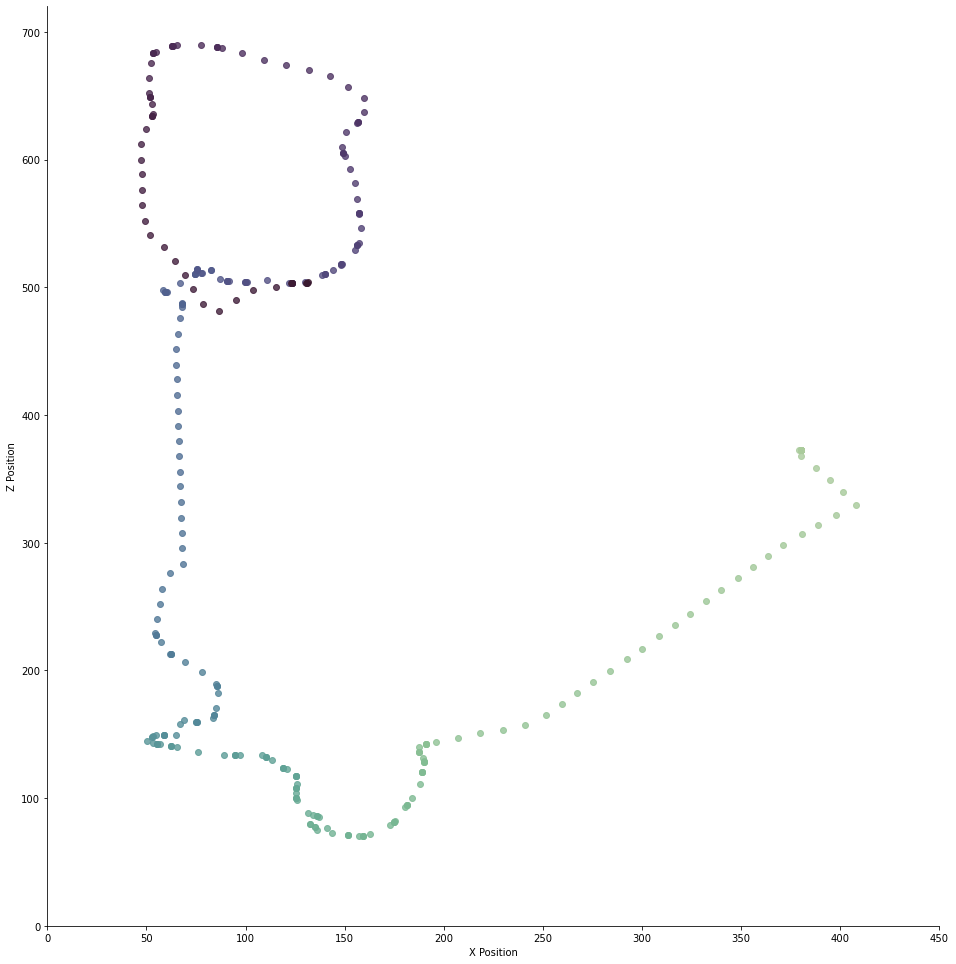

In [68]:
# Creamos una gráfica de dispersión usando seaborn
g = sns.lmplot(x = 'X_Pos', y = 'Z_Pos', # Elegimos los ejes a graficar
               data = player, # Especificamos de dónde obtendremos los datos
               hue= "Game_Time", # Parámetro para cambiar el color de la gráfica
               fit_reg = False, # No hacemos el ajuste de regresión lineal
               legend = False, # No mostramos la caja de leyenda
               palette = "ch:s=1,rot=-1") # Elegimos la paleta de colores

# Seleccionamos los límites de los ejes
g.set(xlim=(0,450),ylim=(0,720))

# Cambiamos el nombre de los ejes
g.set_axis_labels('X Position', 'Z Position')

# Cambiamos el tamaño del gráfico
g.fig.set_size_inches(15, 15)

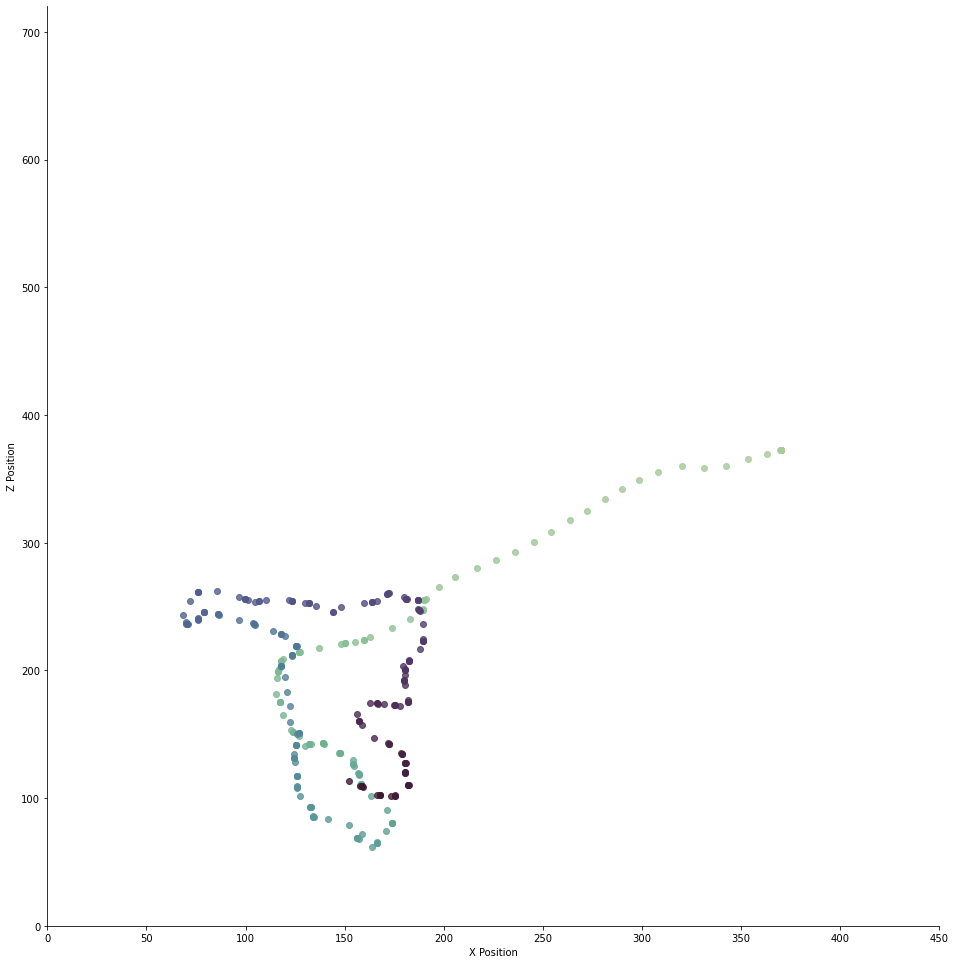

In [71]:
# Hacemos lo mismo pero con otro jugador
player = new_df.loc["JoseCuellar", ["Game_Time", "X_Pos", "Z_Pos"]]

# Creamos una gráfica de dispersión usando seaborn
g = sns.lmplot(x = 'X_Pos', y = 'Z_Pos', # Elegimos los ejes a graficar
               data = player, # Especificamos de dónde obtendremos los datos
               hue= "Game_Time", # Parámetro para cambiar el color de la gráfica
               fit_reg = False, # No hacemos el ajuste de regresión lineal
               legend = False, # No mostramos la caja de leyenda
               palette = "ch:s=1,rot=-1") # Elegimos la paleta de colores

# Seleccionamos los límites de los ejes
g.set(xlim=(0,450),ylim=(0,720))

# Cambiamos el nombre de los ejes
g.set_axis_labels('X Position', 'Z Position')

# Cambiamos el tamaño del gráfico
g.fig.set_size_inches(15, 15)

## Machine Learning


## Conclusiones